In [1]:
import numpy as np
import random

In [4]:
try1 = np.zeros((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
"""
randomly putting sources into different places and there is no specific number of sources.
"""
init_sum = 0

while init_sum < 10:
    try1[1:9, 1:9] = np.random.randint(low=2, size=(8,8))
    init_sum = int(np.count_nonzero(try1==1))

print(init_sum)
"""
This is the process where assigning extra sources(1) into 0 randomly.
"""
if init_sum > 20:
    row_list = np.nonzero(try1)[0]
    column_list = np.nonzero(try1)[1]
    diff_sum = init_sum - 20

    alist = list(range(len(row_list)))
    list_del = random.sample(alist, k = diff_sum)

    for i in list_del:
        try1[row_list[i]][column_list[i]] = 0



31


In [1]:
import Environment.envs as env
import Agent.agent as agent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [7]:
# class to run the agent and the environment

class GameClass():
    """
    Class describing an env of the game and the interaction between the agent and the env

    Procedure 
    1. creating map  
    2. creating agent on specific location
    3. let agent randomly move 
    4. update the map  
    """
    def __init__(self):

        self.env = env.gridEnvs()
        self.agent = agent.agentClass(agent_id=2, init_loc=[0,3], sources = self.env.source , map = self.env.map)
        print(self.env.map)
        pass

    # reset the agent when an episode begin 
    def reset(self):
        pass

    # agent take the step and interact with the environment 
    def step(self):
        pass

    # Action reward given to the agent
    def get_rewared(self):
        pass

    # Actual action taken by the agent
    def taken_action(self):

        # Taking random action 
        random_action = np.random.randint(4)
        
        self.agent.agent_move(direction=random_action)



In [8]:
game1 = GameClass()

[[0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
game1.taken_action()

In [10]:
game1.taken_action()

In [11]:
game1.env.map

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
game1.agent.agent_location

[[0, 3], [0, 2], [-1, 2]]

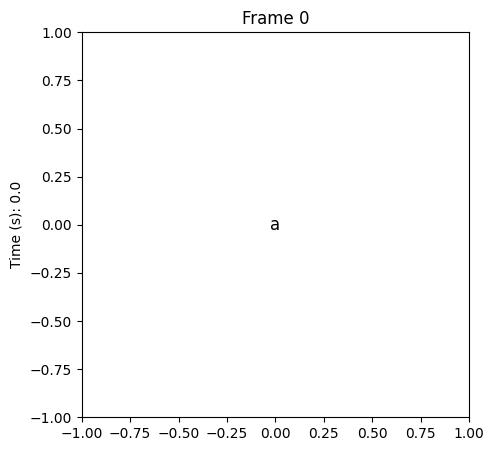

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set(xlim=(-1, 1), ylim=(-1, 1))
string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
label = ax.text(0, 0, string_to_type[0],
                ha='center', va='center',
                fontsize=12)
 
def animate(i):
    label.set_text(string_to_type[:i+1])
    ax.set_ylabel('Time (s): ' + str(i/10))
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, frames=len(string_to_type), interval=100)


In [18]:
a = 0

for i in range(10):
    a=1
    print(a)

1
1
1
1
1
1
1
1
1
1
